### 데이터 가공

## 1. 데이터를 읽어들여 bikes데이터 프레임 만들기

In [374]:
# folium 모듈 설치하기

In [375]:
import folium

In [376]:
pip install matplotlib

In [377]:
import matplotlib

In [378]:
import seaborn

In [379]:
# 모듈 import하기 / pandas, seaborn, matplotlib.pyplot, folium

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
  

In [380]:
bike_imsi = pd.read_csv('data/bike_rent_1.csv', encoding='cp949', parse_dates=['대여일시'])

In [381]:
bike_imsi.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230


In [382]:
bike_imsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   자전거번호     399999 non-null  object        
 1   대여일시      399999 non-null  datetime64[ns]
 2   대여 대여소번호  399999 non-null  int64         
 3   대여 대여소명   399999 non-null  object        
 4   이용시간      399999 non-null  int64         
 5   이용거리      399999 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 18.3+ MB


In [383]:
# 6개의 파일로 나누어진 bike_rent파일을 하나씩 읽어오기

bikes_temp = {}         #빈 데이터 프레임

# 6개의 파일을 bikes_temp[0]~[5]까지 읽어 들인다
for i in range(6):
    bikes_temp[i] = pd.read_csv('data/bike_rent_{}.csv'.format(i+1), encoding='cp949', parse_dates=['대여일시'])


In [384]:
#각각 파일 확인
bikes_temp

{0:             자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리
 0       SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330
 1       SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180
 2       SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930
 3       SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340
 4       SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230
 ...           ...                 ...       ...                ...   ...   ...
 399994  SPB-16680 2019-06-28 17:14:00       316         종각역 1번출구 앞    16  2360
 399995  SPB-07874 2019-06-28 16:59:00       345         서울보증보험본사 앞    32  1880
 399996  SPB-21622 2019-06-28 16:44:00       526           용답토속공원 앞    64  6100
 399997  SPB-20056 2019-06-28 17:46:00       453  종로오가 지하쇼핑센터 14번출구     7   880
 399998  SPB-18692 2019-06-28 17:34:00       345         서울보증보험본사 앞    35  1820
 
 [399999 rows x 6 columns],
 1:    

In [385]:
#6개의 파일을 최종 bikes파일로 데이터 프레임 만들어 bikes에 저장하기
#ignore_index 기존 인덱스를 무시하고 다시 순서를 0부터 정한다.
bikes = pd.concat(bikes_temp,ignore_index=True )
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230


In [386]:
bikes.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
2215627,SPB-22438,2019-06-24 07:40:00,240,문래역 4번출구 앞,13,900
2215628,SPB-24455,2019-06-25 07:34:00,240,문래역 4번출구 앞,6,880
2215629,SPB-24557,2019-06-26 08:19:00,240,문래역 4번출구 앞,7,930
2215630,SPB-00649,2019-06-27 07:38:00,240,문래역 4번출구 앞,11,1030
2215631,SPB-14209,2019-06-28 07:37:00,240,문래역 4번출구 앞,6,1010


In [387]:
#최종 행을 확인해서 제대로 연결 되었는지 확인  2215631행


## 2.데이터 프레임 관찰

In [388]:
# bike데이터 프레임의 기본정보 확인하기


In [389]:
# 프레임의 전체 구조 (행, 열) 확인하기


In [390]:
# 프레임의 행 확인하기


In [391]:
#프레임의 열 확인하기


In [392]:
#프레임의 index 확인하기,  인덱스의 시작과 끝 그리고 step


In [393]:
#프레임의 컬럼의 내용 확인하기


In [394]:
# 데이터 타입 확인하기


In [395]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230


In [396]:
# 데이터 프레임 통계 요약정보 확인하기
bikes.describe()

,대여일시,대여 대여소번호,이용시간,이용거리
count,2215632,2215632.00,2215632.00,2215632.00
mean,2019-06-16 08:40:01.500303872,1226.15,27.17,3912.92
min,2019-06-01 00:00:00,3.00,1.00,0.00
25%,2019-06-08 22:04:00,505.00,8.00,1220.00
50%,2019-06-16 15:13:00,1159.00,17.00,2270.00
75%,2019-06-23 20:22:00,1846.00,37.00,4670.00
max,2019-06-30 23:59:00,9998.00,3133.00,232310.00
std,NaN,849.92,29.08,5145.47


In [397]:
# 소숫점 자리를 소수둘째자리까지만 보기 편하게 변환
pd.options.display.float_format='{:.2f}'.format

In [398]:
## 수치데이터 이외의 다른 정보 확인하기 'object', 'datetime64'
bikes.describe(include=['object', 'datetime64'])

,자전거번호,대여일시,대여 대여소명
count,2215632,2215632,2215632
unique,19029,NaN,1543
top,SPB-17237,NaN,뚝섬유원지역 1번출구 앞
freq,292,NaN,12617
mean,NaN,2019-06-16 08:40:01.500303872,NaN
min,NaN,2019-06-01 00:00:00,NaN
25%,NaN,2019-06-08 22:04:00,NaN
50%,NaN,2019-06-16 15:13:00,NaN
75%,NaN,2019-06-23 20:22:00,NaN
max,NaN,2019-06-30 23:59:00,NaN


In [399]:
# 결측치 확인하기
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
이용시간        0
이용거리        0
dtype: int64

In [400]:
# 열단위로 모두 합산하여 결측치 확인하기
  

## 3 .시간계산에 따른 새로운 컬럼 추가

In [401]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230


In [402]:
# 대여일시에서 day정보 추출해서 일자 컬럼으로 추가하기
bikes['대여일시'].dt.day

0           3
1           3
2           5
3           5
4          10
           ..
2215627    24
2215628    25
2215629    26
2215630    27
2215631    28
Name: 대여일시, Length: 2215632, dtype: int32

In [403]:
bikes['일자'] = bikes['대여일시'].dt.day
bikes.head(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5


In [404]:
# 대여일시에서 시간정보 추출해서 대여시간대 컬럼으로 추가하기
bikes['대여시간대'] = bikes['대여일시'].dt.hour
bikes.head(3)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8


In [405]:
week = ['월', '화', '수','목', '금', '토', '일']
bikes['대여일시'].dt.dayofweek.apply(lambda x: week[x])

0          월
1          월
2          수
3          수
4          월
          ..
2215627    월
2215628    화
2215629    수
2215630    목
2215631    금
Name: 대여일시, Length: 2215632, dtype: object

In [406]:
# 대여일시에서 dayofweek 추출해서 요일 컬럼으로 추가하기
# 이때 요일이 숫자이므로 요일 이름으로 변경하여 추가하기
week = ['월', '화', '수','목', '금', '토', '일']
bikes['요일'] = bikes['대여일시'].dt.dayofweek.apply(lambda x: week[x])
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월


In [407]:
# 대여일시에서 dayofweek 추출해서 주말구분 컬럼으로 추가하기
# 요일 인데스 값이 5보다 작을 경우 평일 아닐 경우 주말
bikes['주말구분'] = bikes['대여일시'].dt.day_of_week.apply(lambda x: '평일' if x < 5 else '주말')
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수,평일
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월,평일


## 4. 장소적 특성에 따른 컬럼 추가

In [408]:
# 대여소들이 위치한 행정구역상의 구들을 알아내기 위해 "bike_shop.csv" 파일을 읽어오기 

bike_shop = pd.read_csv('data/bike_shop.csv', encoding='cp949')

In [409]:
# 데이터프레임 살펴보기
bike_shop.head()

,구분,대여소번호,대여소명,위도,경도,거치대수
0,마포구,101,101. (구)합정동 주민센터,37.55,126.91,5
1,마포구,102,102. 망원역 1번출구 앞,37.56,126.91,20
2,마포구,103,103. 망원역 2번출구 앞,37.55,126.91,14
3,마포구,104,104. 합정역 1번출구 앞,37.55,126.91,13
4,마포구,105,105. 합정역 5번출구 앞,37.55,126.91,5


In [410]:
bikes.head(3)    ## 대여소명 프레임과 컬럼명 확인

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일


In [411]:
# 필요한 컬럼들을 추출해서 'bkie_gu'에 할당
# '구분','대여소번호','대여소명','위도','경도'
bike_gu = bike_shop
bike_gu.head()

,구분,대여소번호,대여소명,위도,경도,거치대수
0,마포구,101,101. (구)합정동 주민센터,37.55,126.91,5
1,마포구,102,102. 망원역 1번출구 앞,37.56,126.91,20
2,마포구,103,103. 망원역 2번출구 앞,37.55,126.91,14
3,마포구,104,104. 합정역 1번출구 앞,37.55,126.91,13
4,마포구,105,105. 합정역 5번출구 앞,37.55,126.91,5


In [412]:
# bikes 데이터 프레임에 bike_gu 데이터프레임 합치기, 기준은 대여소 번호

bikes = pd.merge(bikes, bike_gu, left_on =  '대여 대여소번호', right_on='대여소번호')

bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,구분,대여소번호,대여소명,위도,경도,거치대수
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,646,646. 장한평역 1번출구 (국민은행앞),37.56,127.06,10
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,526,526. 용답토속공원 앞,37.56,127.06,10
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일,동대문구,646,646. 장한평역 1번출구 (국민은행앞),37.56,127.06,10
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수,평일,동대문구,646,646. 장한평역 1번출구 (국민은행앞),37.56,127.06,10
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월,평일,성동구,529,529. 장한평역 8번 출구 앞,37.56,127.06,15


In [413]:
# 중복 컬럼 삭제 (대여소번호, 대여소명)하기
bikes.drop(['대여소번호'], axis='columns', inplace=True)


In [414]:
bikes.drop(['대여소명'], axis='columns', inplace=True)

In [415]:
bikes.head(2)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,구분,위도,경도,거치대수
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.56,127.06,10
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,37.56,127.06,10


In [416]:
# 컬럼명 변경하기 '구분'-> '대여구','위도'-> '대여점위도','경도'-> '대여점경도'
bikes.rename(columns={'구분' : '대여구','위도' : '대여점위도','경도': '대여점경도'}, inplace=True)
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,대여구,대여점위도,대여점경도,거치대수
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.56,127.06,10
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,37.56,127.06,10
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일,동대문구,37.56,127.06,10
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수,평일,동대문구,37.56,127.06,10
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월,평일,성동구,37.56,127.06,15


In [417]:
#추가된 컬럼에 누락값이 있는지 확인하기


In [418]:
#바뀐 테이블의 정보 확인하기


## 5. 시간 개념에 따른 시각화

In [419]:
bikes.head(5)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,대여구,대여점위도,대여점경도,거치대수
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.56,127.06,10
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,37.56,127.06,10
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일,동대문구,37.56,127.06,10
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수,평일,동대문구,37.56,127.06,10
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월,평일,성동구,37.56,127.06,15


## 한글 폰트 설정 

In [420]:
import matplotlib.font_manager as fm

In [421]:
font_list = [font.name for font in fm.fontManager.ttflist]

In [422]:
'Malgun Gothic' in font_list

True

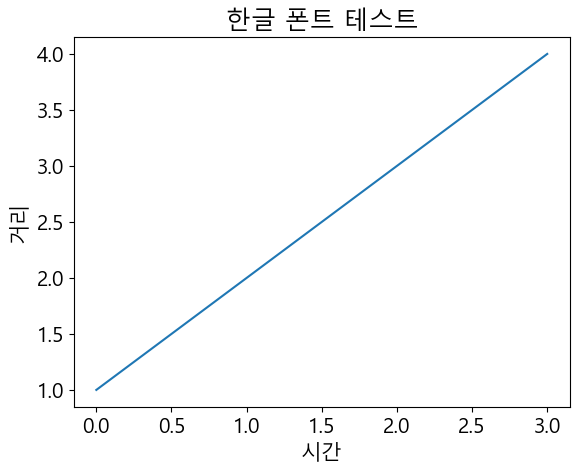

In [423]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic', size=15)

plt.title('한글 폰트 테스트')
plt.plot([1,2,3,4])
plt.xlabel('시간')
plt.ylabel('거리')

plt.show()

In [424]:
# 시각화를 위해 한글폰트 설정하기

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic', size=15)

C:\Users\USER\AppData\Local\Temp\ipykernel_13532\2355212697.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bikes, x='일자',palette='coolwarm')


<Axes: xlabel='일자', ylabel='count'>

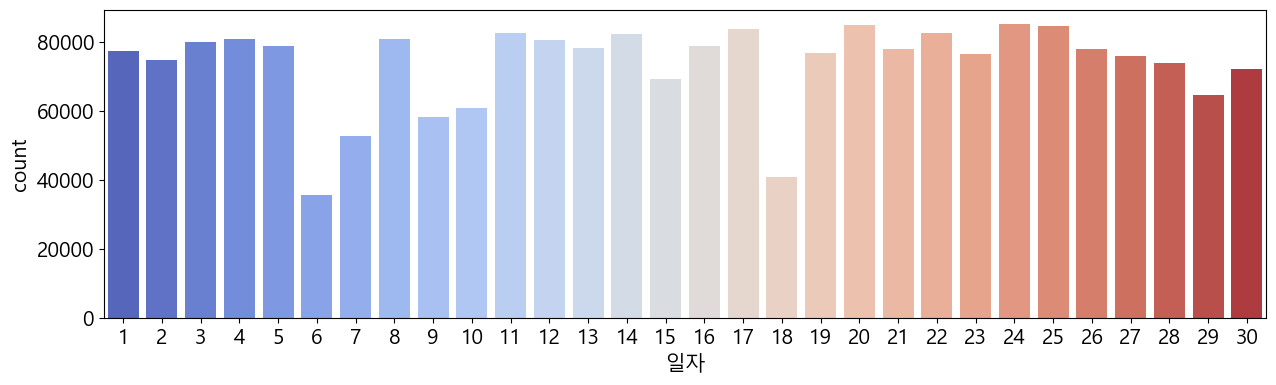

In [425]:
# 일자별 따릉이 이용건수 그래프 그리기
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='일자',palette='coolwarm')


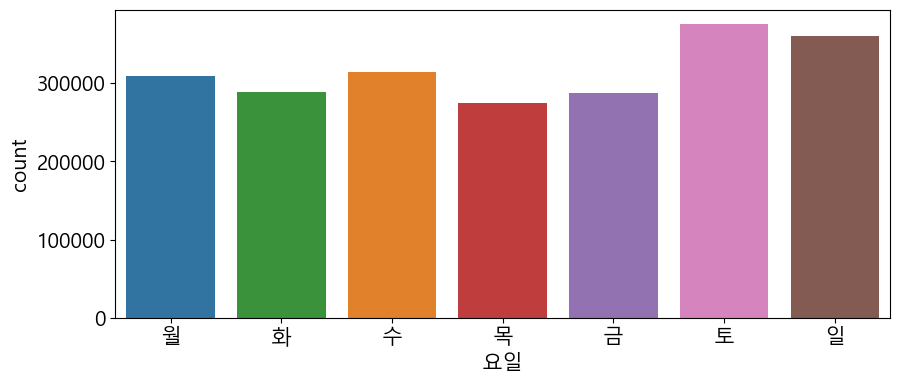

In [426]:
#요일별 따릉이 이용건수 그래프 그리기
plt.figure(figsize=(10,4))
sns.countplot(data=bikes, x='요일', order=['월','화','수','목','금','토','일'], hue='요일')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_13532\43387474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bikes, x='대여시간대',palette='flare')


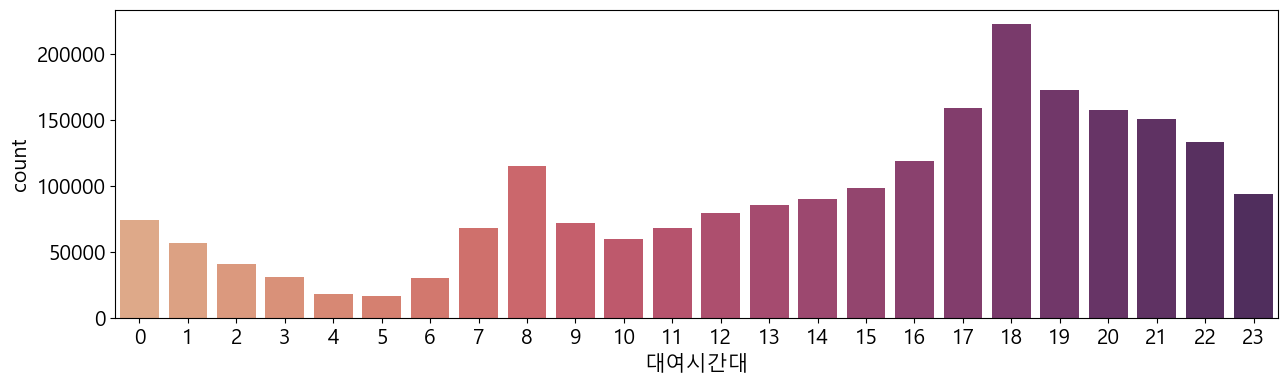

In [427]:
# 대여시간대별 따릉이 이용건수 그래프 그리기

plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='대여시간대',palette='flare')
plt.show()

In [428]:
### sns.countplot() 사용하기

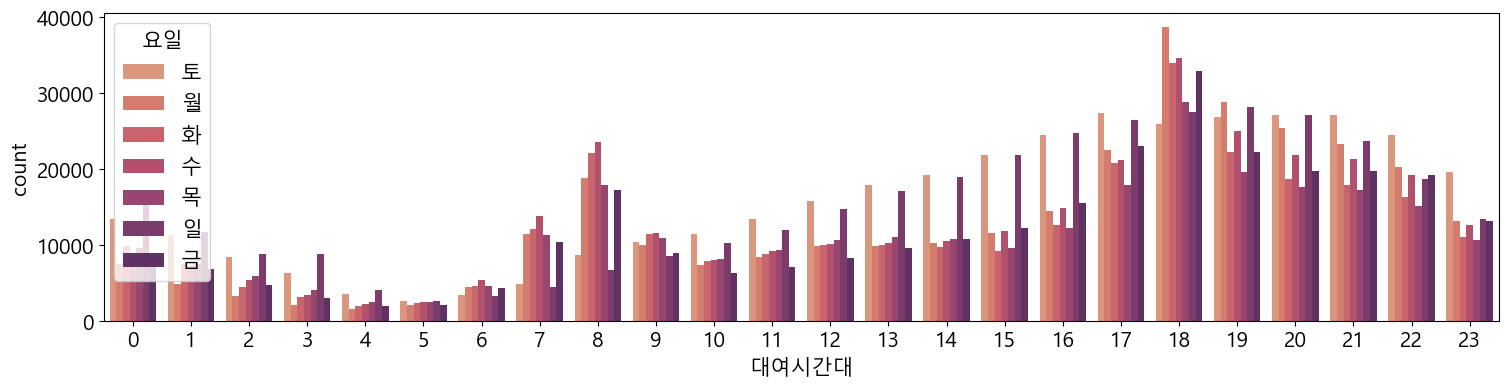

In [429]:
# sns.countplot()를 이용하여 대여시간대 X 요일이용건수 막대그래프 그리기

plt.figure(figsize=(18,4))
sns.countplot(data=bikes, x='대여시간대',palette='flare', hue='요일')
plt.show()


In [430]:
bikes.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,대여구,대여점위도,대여점경도,거치대수
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.56,127.06,10
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,37.56,127.06,10
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일,동대문구,37.56,127.06,10
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수,평일,동대문구,37.56,127.06,10
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월,평일,성동구,37.56,127.06,15


In [431]:
# 두가지 요인을 위해 피봇 테이블 생성하기: 대여시간대 X 요일별 자전거 이용건수
# hourly_dayofweek_ride에 저장

hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')
hourly_dayofweek_ride.head()

요일,금,목,수,월,일,토,화
대여시간대,,,,,,,
0,8353,9568,8624,7461,17025,13438,9907
1,6748,7508,7226,4846,11731,11232,7529
2,4762,5857,5328,3305,8804,8348,4497
3,3045,3992,3430,2102,8748,6221,3157
4,1979,2402,2160,1544,4076,3584,1971


<Axes: xlabel='요일', ylabel='대여시간대'>

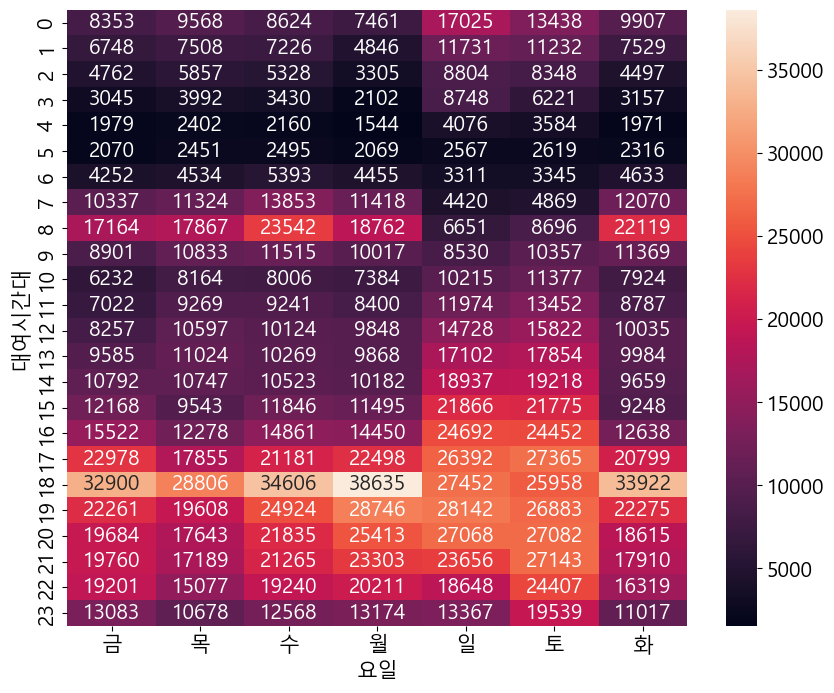

In [432]:
# sns의 대여시간대 X 요일이용건수 히트맵그래프 그리기

plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d')

<Axes: title={'center': '대여시간대 X 일별이용건수'}, xlabel='대여시간대'>

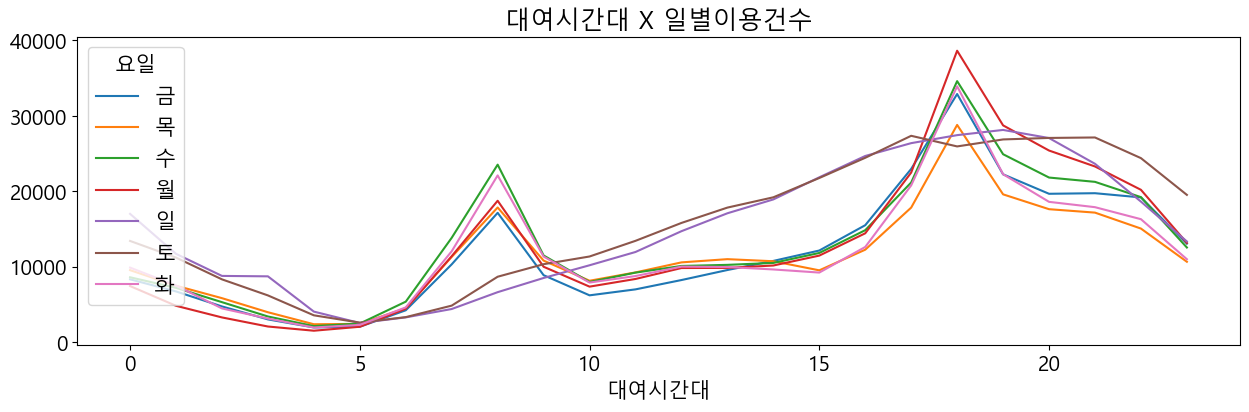

In [433]:
hourly_dayofweek_ride.plot(kind='line', title='대여시간대 X 일별이용건수', figsize=(15,4))

<Axes: title={'center': '대여시간대 X 일별이용건수'}, xlabel='대여시간대'>

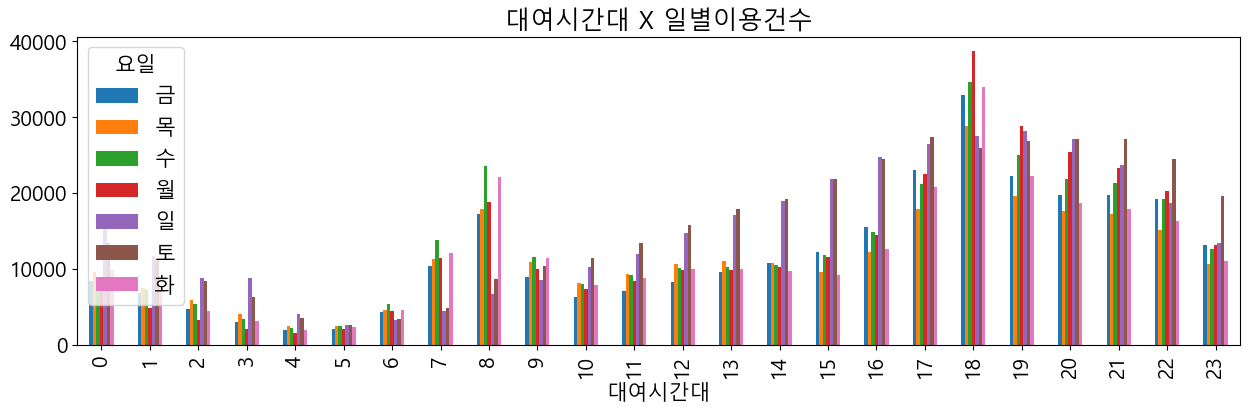

In [434]:
hourly_dayofweek_ride.plot(kind='bar', title='대여시간대 X 일별이용건수', figsize=(15,4))

## 6. 주말 구분 시각화 

<Axes: xlabel='주말구분', ylabel='대여시간대'>

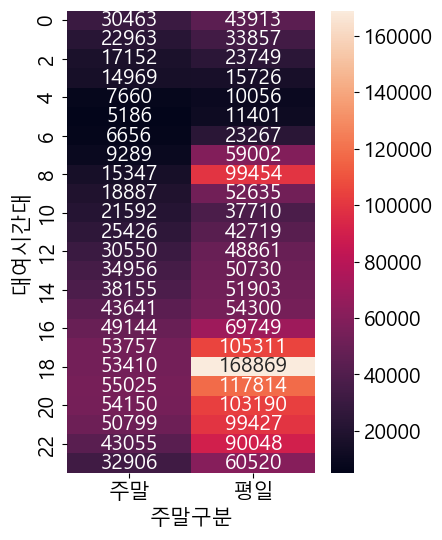

In [435]:
## 주말 구분이 들어간 피봇 테이블 설정하기 weekdays_hourly_ride
plt.figure(figsize=(4,6))
weekdays_hourly_ride = bikes.pivot_table(index='대여시간대', columns='주말구분', values='자전거번호', aggfunc='count')
sns.heatmap(data=weekdays_hourly_ride, annot=True, fmt='d')

<Axes: title={'center': '대여시간대 X 주휴별이용건수'}, xlabel='대여시간대'>

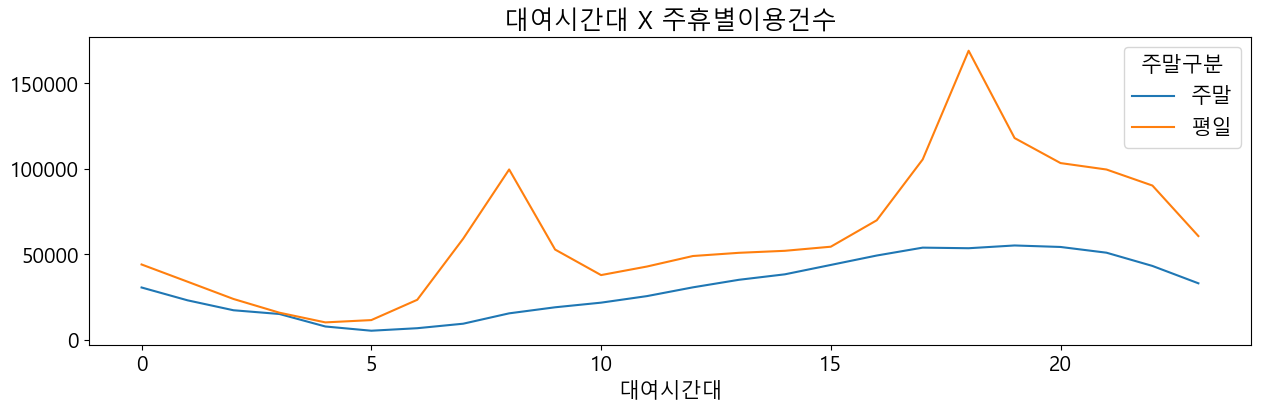

In [436]:
# weekdays_hourly_ride를 이용하여 대여시간대 X 주말이용건수 선그래프 그리기
weekdays_hourly_ride.plot(kind='line', title='대여시간대 X 주휴별이용건수', figsize=(15,4))

<Axes: title={'center': '대여시간대 X 주휴별이용건수'}, xlabel='대여시간대'>

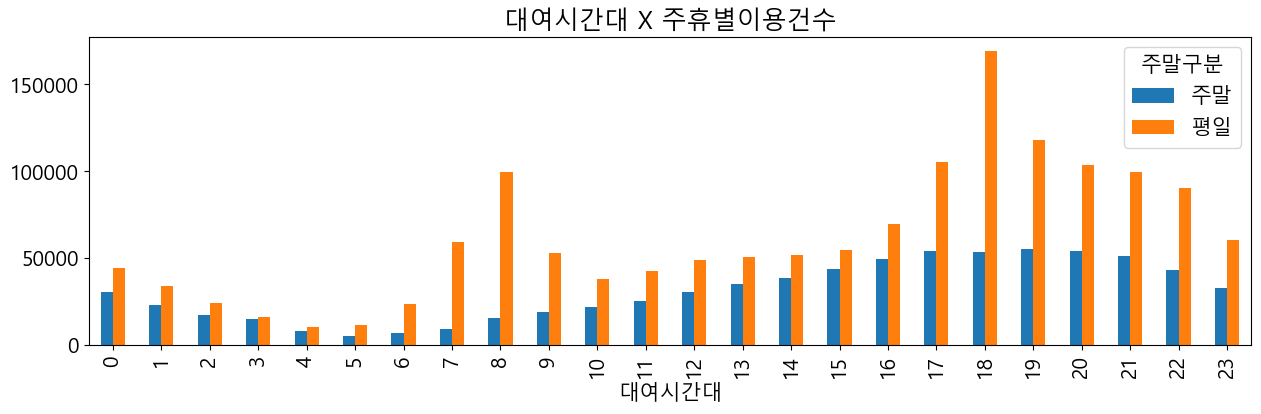

In [437]:
# weekdays_hourly_ride를 이용하여 대여시간대 X 주말이용건수 막대그래프 그리기
weekdays_hourly_ride.plot(kind='bar', title='대여시간대 X 주휴별이용건수', figsize=(15,4))

In [438]:
# sns.countplot을 이용하여 대여시간대 X 주말이용건수 선그래프 그리기

plt.figure(figsize=(15, 4))


<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

In [439]:
# sns를 이용하여 대여시간대 X 주말이용건수 히트맵 그리기

plt.figure(figsize=(10,8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

## 7. 장소에 따른 시각화 folium

In [440]:
# 대여구별 이용건수 피봇테이블 만들기, 구별자전거이용건수

구별자전거이용건수 = bikes.pivot_table(index='대여구', values='자전거번호', aggfunc='count')
구별자전거이용건수

,자전거번호
대여구,
강남구,97081
강동구,78231
강북구,40563
강서구,141006
관악구,83382
광진구,141996
구로구,78696
금천구,33488
노원구,113823


In [441]:
# 구별자전거이용건수 데이터프레임을 이용건수를 기준으로 오름차순으로 정렬하기


구별자전거이용건수.sort_values(by='자전거번호', ascending=True, inplace = True)

<Axes: title={'center': '대여구별 자전거 이용건수'}, ylabel='대여구'>

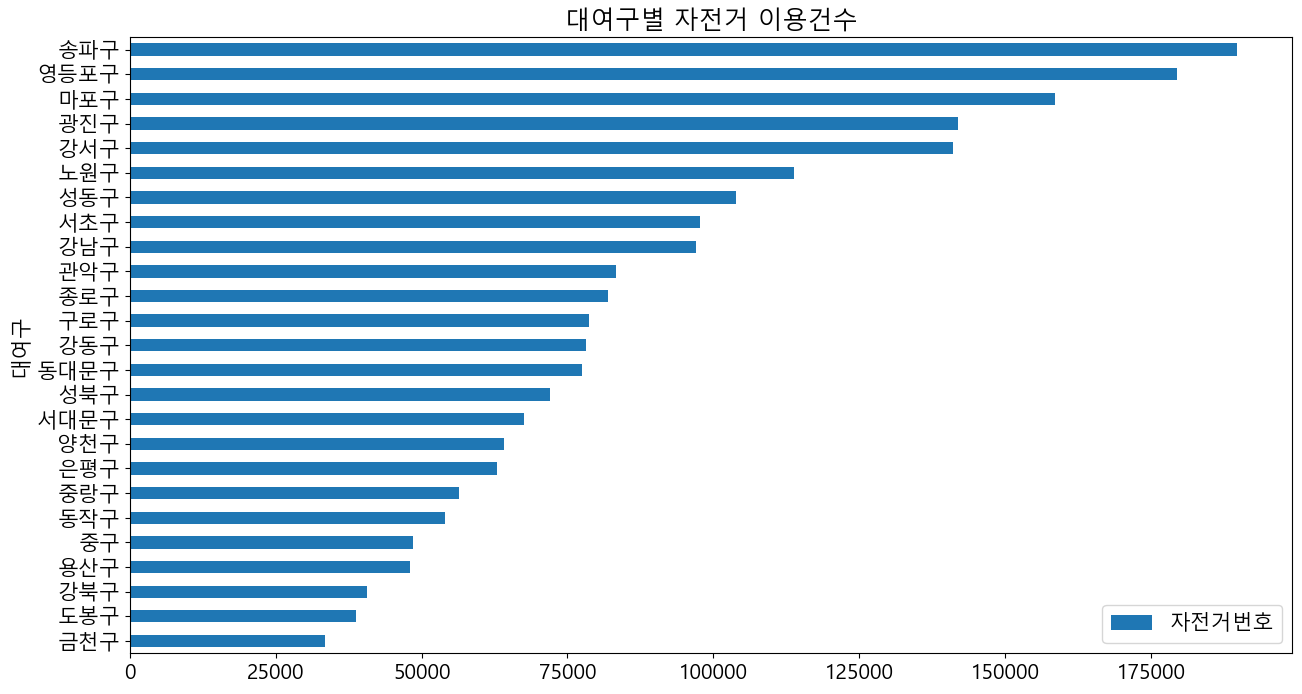

In [442]:
# 구별자전거이용건수 수평막대그래프 그리기
구별자전거이용건수.plot(kind='barh',figsize=(15, 8), title='대여구별 자전거 이용건수')

In [443]:
# 구별자전거이용건수 인덱스 번호 초기화하기기
구별자전거이용건수.reset_index(inplace=True)
구별자전거이용건수.head(2)

,대여구,자전거번호
0,금천구,33488
1,도봉구,38697


In [444]:
# 서울시 지도파일 정보 로드하기기

import json
with open('data/seoul.json','r', encoding='utf-8') as f:
    서울시지도 = json.load(f)

In [445]:
서울시지도

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11540412678968, 37.557491025257455],
      [127.1165206546129, 37.557268061772696],
      [127.1175954493625, 37.55705301284316],
      [127.11879551821994, 37.557222485451305],
      [127.11969651045837, 37.558176474822524],
      [127.12057912633198, 37.5590144597372],
      [127.12146867175024, 37.55986003393365],
      [127.12240146859469, 37.5604208685133],
      [127.12287911525227, 37.56070873375976],
      [127.12303576608339, 37.56078573052513],
      [127.12435254630417, 37.56144246249796],
      [127.12447748580927, 37.56148569898355],
      [127.13349006006634, 37.56465664804646],
      [127.13357625665371, 37.56468978043648],
      [127.1336638698021, 37.56472375596808],
      [127.133755022522

In [446]:
bikes

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,대여구,대여점위도,대여점경도,거치대수
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.56,127.06,10
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,37.56,127.06,10
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일,동대문구,37.56,127.06,10
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수,평일,동대문구,37.56,127.06,10
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월,평일,성동구,37.56,127.06,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209344,SPB-22438,2019-06-24 07:40:00,240,문래역 4번출구 앞,13,900,24,7,월,평일,영등포구,37.52,126.90,10
2209345,SPB-24455,2019-06-25 07:34:00,240,문래역 4번출구 앞,6,880,25,7,화,평일,영등포구,37.52,126.90,10
2209346,SPB-24557,2019-06-26 08:19:00,240,문래역 4번출구 앞,7,930,26,8,수,평일,영등포구,37.52,126.90,10
2209347,SPB-00649,2019-06-27 07:38:00,240,문래역 4번출구 앞,11,1030,27,7,목,평일,영등포구,37.52,126.90,10


In [447]:
# 지도에 나타내기 위해 대여점 위도와 대여점 경도의 평균값 구하기

lat = bikes['대여점위도'].mean()
lon = bikes['대여점경도'].mean()
print(lat, lon)

37.54734988442208 126.99171375924


In [448]:
# 지도에 위치 표시하기 folium.Map() 함수 이용

map1 = folium.Map(location=[lat,lon], zoom_start=10)
map1

In [449]:
# 지도위에 구별자전거 이용건수 시각화하기 folium.Choropleth() 사용


folium.Choropleth(geo_data=서울시지도, data=구별자전거이용건수, 
                 columns=['대여구','자전거번호'],
                 key_on='feature.properties.name',
                 fill_color='YlGnBu').add_to(map1)

map1

In [450]:
bikes

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,이용시간,이용거리,일자,대여시간대,요일,주말구분,대여구,대여점위도,대여점경도,거치대수
0,SPB-22040,2019-06-03 08:49:00,646,장한평역 1번출구 (국민은행앞),27,1330,3,8,월,평일,동대문구,37.56,127.06,10
1,SPB-07446,2019-06-03 08:33:00,526,용답토속공원 앞,54,1180,3,8,월,평일,성동구,37.56,127.06,10
2,SPB-20387,2019-06-05 08:27:00,646,장한평역 1번출구 (국민은행앞),12,1930,5,8,수,평일,동대문구,37.56,127.06,10
3,SPB-16794,2019-06-05 08:46:00,646,장한평역 1번출구 (국민은행앞),6,1340,5,8,수,평일,동대문구,37.56,127.06,10
4,SPB-18266,2019-06-10 08:27:00,529,장한평역 8번 출구 앞,5,1230,10,8,월,평일,성동구,37.56,127.06,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209344,SPB-22438,2019-06-24 07:40:00,240,문래역 4번출구 앞,13,900,24,7,월,평일,영등포구,37.52,126.90,10
2209345,SPB-24455,2019-06-25 07:34:00,240,문래역 4번출구 앞,6,880,25,7,화,평일,영등포구,37.52,126.90,10
2209346,SPB-24557,2019-06-26 08:19:00,240,문래역 4번출구 앞,7,930,26,8,수,평일,영등포구,37.52,126.90,10
2209347,SPB-00649,2019-06-27 07:38:00,240,문래역 4번출구 앞,11,1030,27,7,목,평일,영등포구,37.52,126.90,10


In [451]:
## 미션: 구별이용시간평균 지도에 나타내기 ##


In [453]:
# 대여구별 이용시간평균 (이용시간)
# 1단계 : 피봇 테이블 만들기

구별이용시간평균 = bikes.pivot_table(index='대여구', values='이용시간', aggfunc='mean')
구별이용시간평균

,이용시간
대여구,
강남구,31.79
강동구,25.39
강북구,23.57
강서구,23.14
관악구,26.51
광진구,24.95
구로구,26.48
금천구,26.40
노원구,24.26


In [463]:
#이용시간 컬럼을 기준으로 오름차순 정렬

구별이용시간평균.sort_values(by='이용시간', ascending=False, inplace = True)
구별이용시간평균

,이용시간
대여구,
용산구,35.30
서초구,32.09
강남구,31.79
동작구,31.66
마포구,30.66
성동구,30.01
영등포구,29.47
서대문구,28.25
송파구,27.85


In [467]:
# 구별 이용시간 평균 reset_index

구별이용시간평균.reset_index(inplace=True)
구별이용시간평균

,대여구,이용시간
0,용산구,35.30
1,서초구,32.09
2,강남구,31.79
3,동작구,31.66
4,마포구,30.66
5,성동구,30.01
6,영등포구,29.47
7,서대문구,28.25
8,송파구,27.85
9,관악구,26.51


In [466]:
#지도 표시하기

map2 = folium.Map(location=[lat,lon], zoom_start=10)
map2

In [ ]:
#구별이용기간 평균에 사용하여 지도를 시각화
folium.Choropleth(geo_data=서울시지도, data=구별이용시간평균, 
                 columns=['대여구','이용시간'],
                 key_on='feature.properties.name',
                 fill_color='YlGnBu').add_to(map1)

## 8 . 시간적 X 장소적

In [ ]:
# pivot_table로 대여일자X 대여구별 따릉이 이용건수 계산하기, daily_gu_use

daily_gu_use = 
daily_gu_use

In [ ]:
# 대여일자X 대여구별 따릉이 이용건수 히트맵으로 표시하기기

plt.figure(figsize=(10,8))


In [ ]:
# 대여일자X 대여구별 따릉이 이용건수 박스플롯으로 그리기

plt.figure(figsize=(10,8))


In [ ]:
## 미션: 대여시간대별 ##

In [ ]:
## 대여시간대 X 대여구 따릉이 이용건수 계산하기

hourly_gu_use = 
hourly_gu_use

In [ ]:
#히트맵
plt.figure(figsize=(10,8))

In [ ]:
# 박스 그래프로 표기
plt.figure(figsize=(15,8))

## 9. TOP 50


In [ ]:
# 미션: 서울시에서 주말에 인기있는 TOP 대여소 지도에 표시하기
# 미션: 서울시에서 평일일에 인기있는 TOP 대여소 지도에 표시하기

In [ ]:
## 대여 대여소  X 주말 구분 이용건수 계산을 위한 피벗 테이블



In [ ]:
# 대여 대여소  X 주말 구분 이용건수 계산을 위한 피벗 테이블 만들기 
# '대여 대여소명','대여점위도','대여점경도'

rent_bikes = 
rent_bikes

In [ ]:
# 인기있는 주말 대여점 50개를 구하기


In [ ]:
# 인기있는 주말 대여점 50개중 '주말' 컬럼만 추출


In [ ]:
# 인기있는 주말 대여점 50개중 '주말' 컬럼만 추출하여 주말대여점50에 저장장

주말대여점50 = 
주말대여점50

In [ ]:
# 평일대여점 데이터 프레임 만들기기
평일대여점50 = 
평일대여점50

In [ ]:
## 주말 대여점50의 가운데 지점의 위도 경도 중심으로 초기 map 그리기

map3


In [ ]:
주말대여점50.head(10)


In [ ]:
# for문을 사용해서 주말 대여점 50지도를 시각화하기


map3


In [ ]:
## 평일 대여점 이 많은 대여소를 표시


map3

In [ ]:
# 시각화데이터를 통해 정보 및 인사이트 도출하기!!!!